# Classification models on Breast cancer Dataset


### Problem Statement:
The problem statement of the Breast Cancer Wisconsin (Diagnostic) dataset is to develop a machine learning model that can accurately classify breast mass as either malignant (cancerous) or benign (non-cancerous) based on the features computed from a digitized image of a fine needle aspirate (FNA) of the breast mass.


### Objective:
The objective is to create a predictive model that can aid in the diagnosis of breast cancer. By analyzing the features of cell nuclei present in the images, the model aims to distinguish between benign and malignant tumors, providing a reliable and automated method for breast cancer detection.

In [172]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [173]:
#load data

from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [174]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [175]:
#loading to dataframe
df_breast_cancer = pd.DataFrame(data=dataset.data, columns = dataset.feature_names)
df_breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [176]:
#adding target to the dataframe
df_breast_cancer['target']=dataset.target

In [177]:
df_breast_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [178]:
#dataset shape
df_breast_cancer.shape

(569, 31)

In [179]:
#creating a copy
df = df_breast_cancer.copy()

In [180]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [181]:
#checking NULL values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [182]:
#checking duplicate values
df[df.duplicated()].count()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [183]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [184]:
### Getting count of unique values in each feature
df.nunique()

mean radius                456
mean texture               479
mean perimeter             522
mean area                  539
mean smoothness            474
mean compactness           537
mean concavity             537
mean concave points        542
mean symmetry              432
mean fractal dimension     499
radius error               540
texture error              519
perimeter error            533
area error                 528
smoothness error           547
compactness error          541
concavity error            533
concave points error       507
symmetry error             498
fractal dimension error    545
worst radius               457
worst texture              511
worst perimeter            514
worst area                 544
worst smoothness           411
worst compactness          529
worst concavity            539
worst concave points       492
worst symmetry             500
worst fractal dimension    535
target                       2
dtype: int64

In [185]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

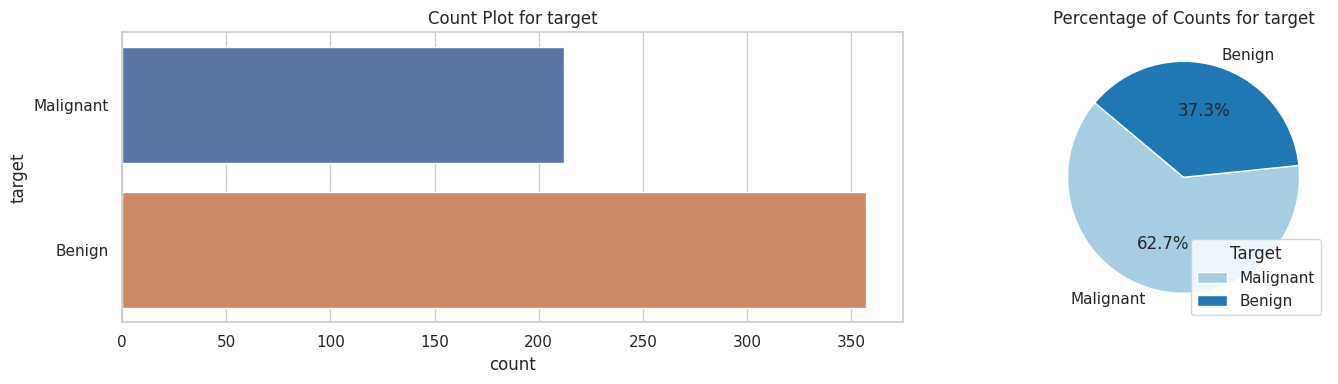

In [186]:

column_name = 'target'

# Create the horizontal countplot
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)  # Create the first subplot
sns.set(style="whitegrid")
sns.countplot(data=df, y=column_name)
plt.title(f'Count Plot for {column_name}')
plt.yticks([0, 1], ['Malignant', 'Benign'])  # Add tick labels for y-axis

# Create the pie plot
plt.subplot(1, 2, 2)  # Create the second subplot
counts = df[column_name].value_counts()
plt.pie(counts, labels=['Malignant', 'Benign'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title(f'Percentage of Counts for {column_name}')

# Add legend to the pie plot
plt.legend(title='Target', labels=['Malignant', 'Benign'], loc='lower right')

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()


# Outliers

In [187]:
### Function to Cap Outlier
def remove_outliers(in_data, in_col):
    # Finding the IQR
    first_quartile = in_data[in_col].quantile(0.25)
    third_quartile = in_data[in_col].quantile(0.75)
    iqr = third_quartile - first_quartile
    upper_limit = third_quartile + 1.5 * iqr
    lower_limit = first_quartile - 1.5 * iqr
    in_data.loc[(in_data[in_col]>upper_limit), in_col]= upper_limit
    in_data.loc[(in_data[in_col]<lower_limit), in_col]= lower_limit
    return in_data

In [188]:
### Capping outliers from continuous features
for feature in df:
    data1=remove_outliers(df, feature)

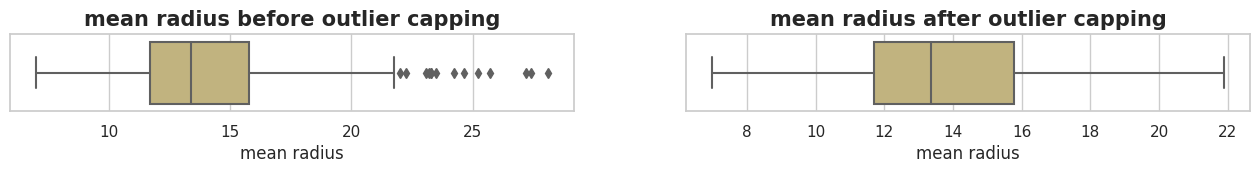

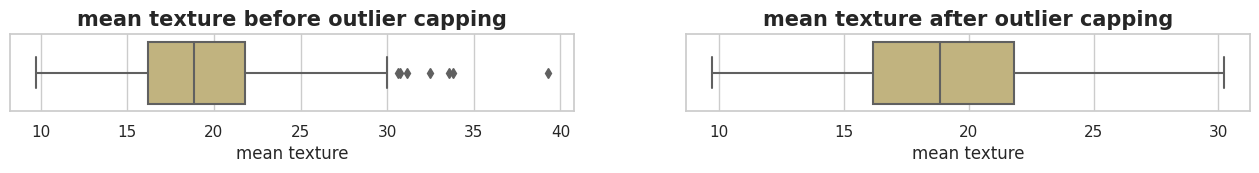

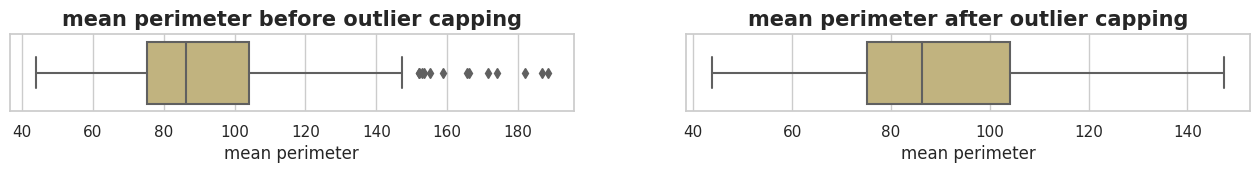

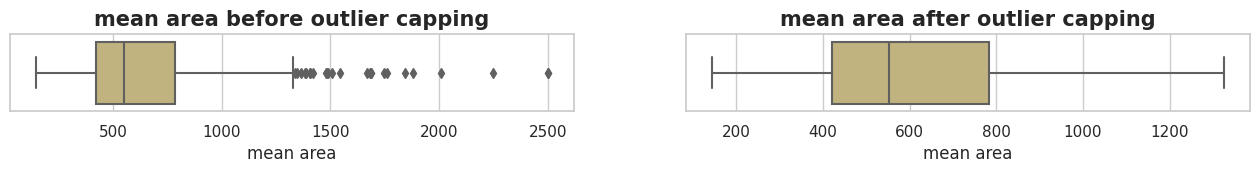

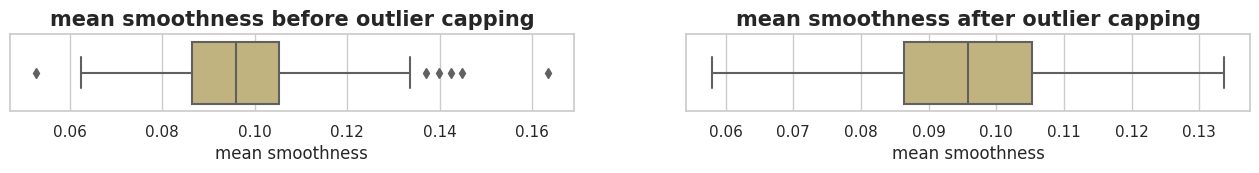

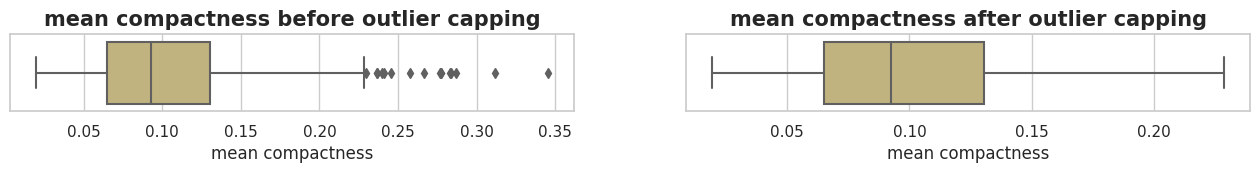

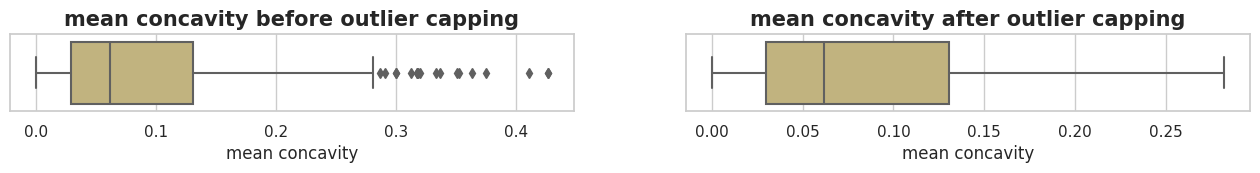

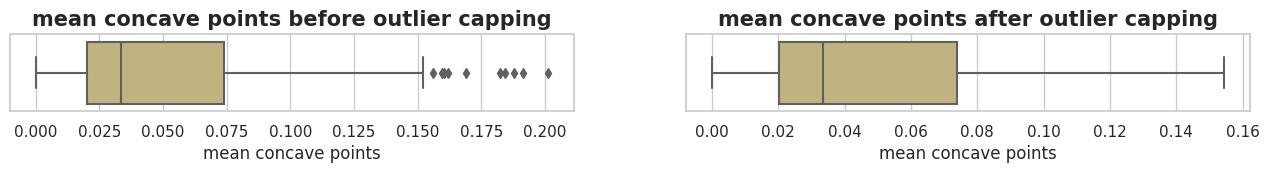

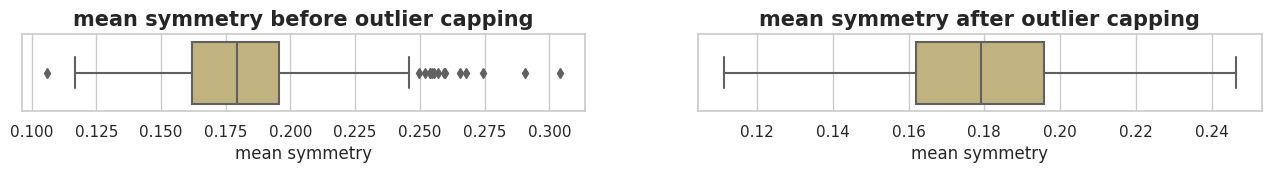

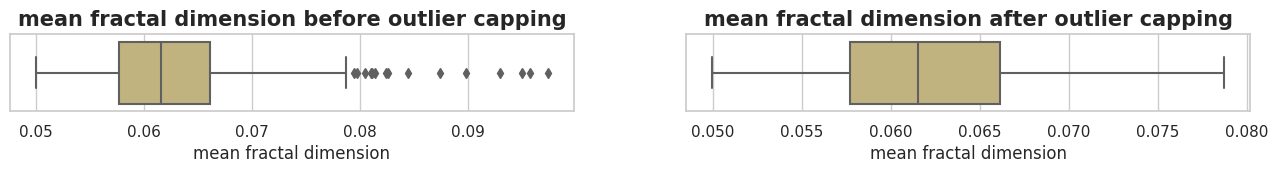

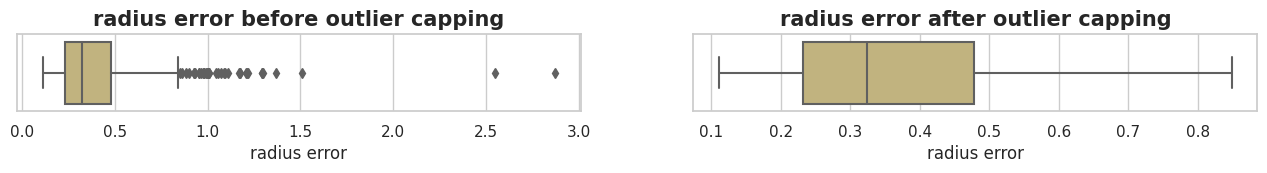

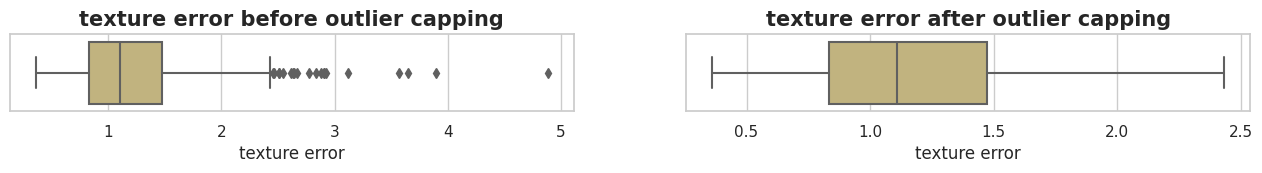

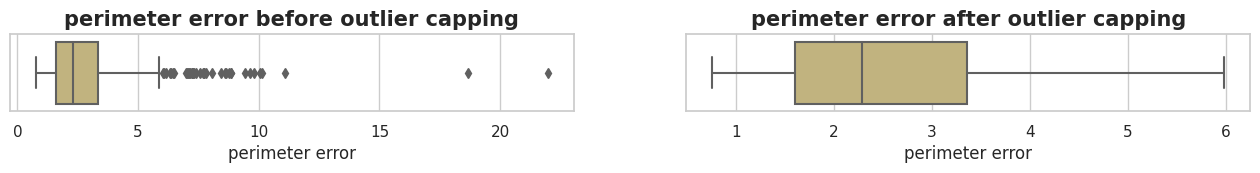

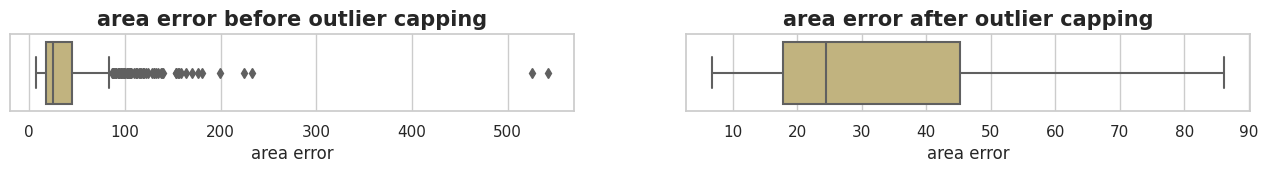

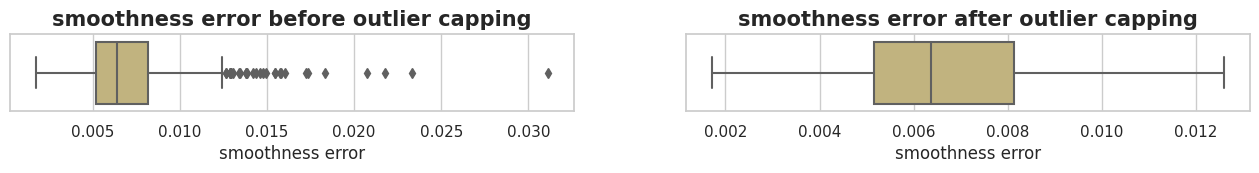

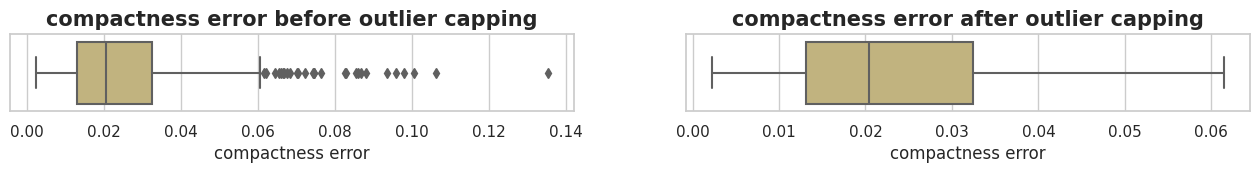

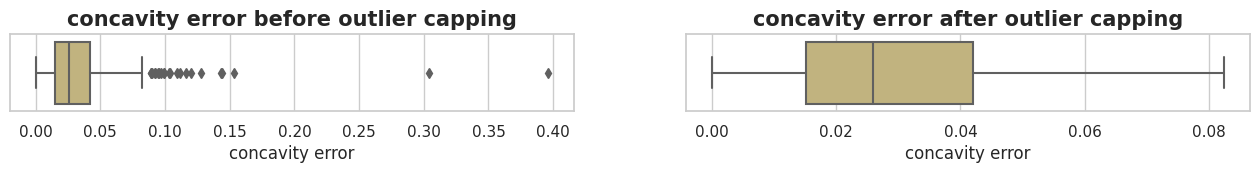

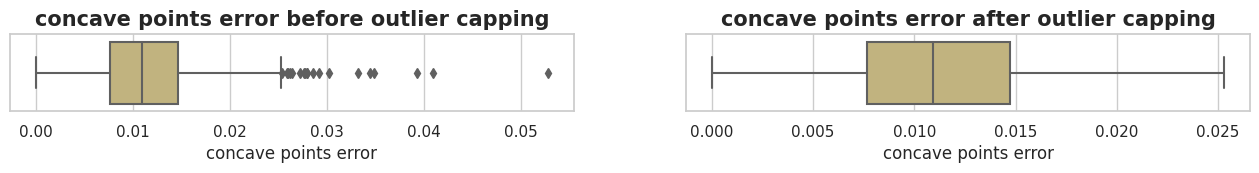

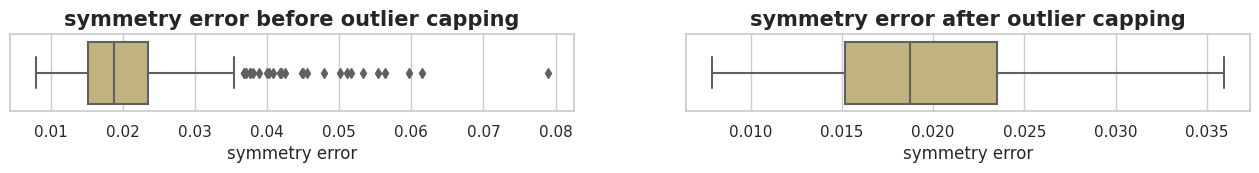

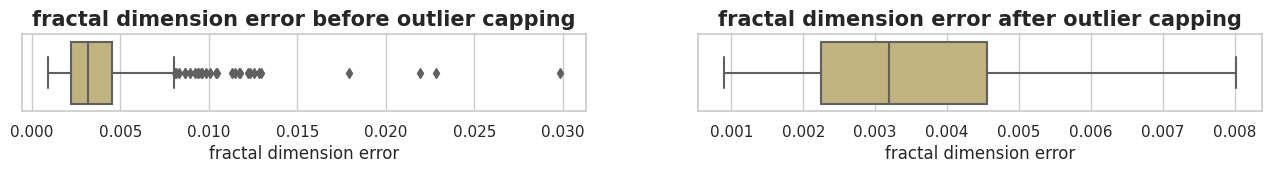

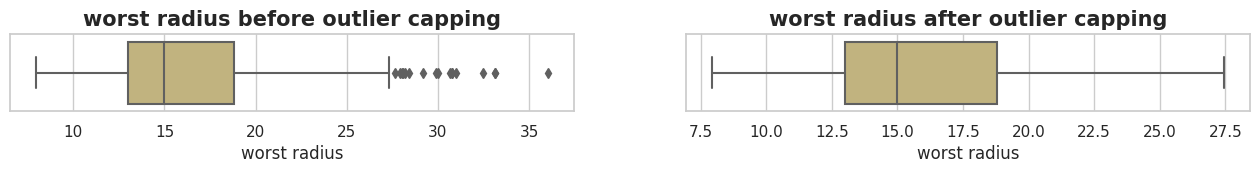

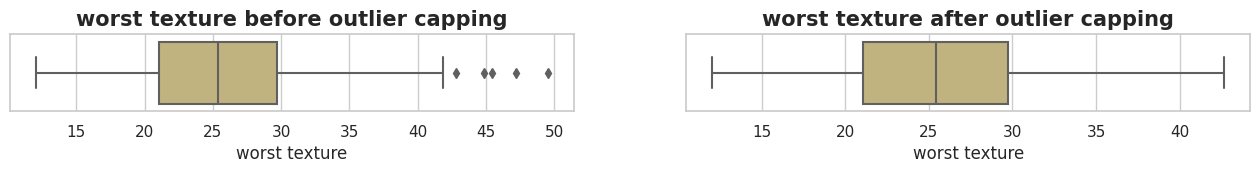

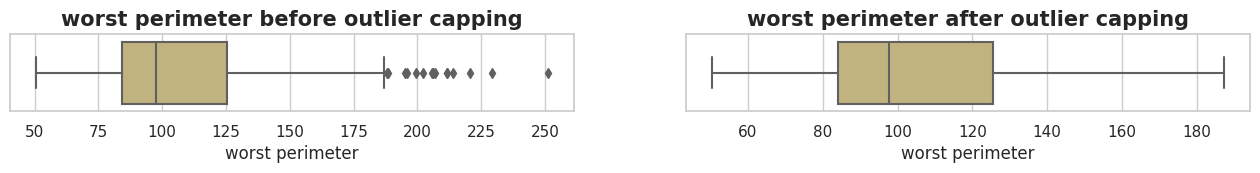

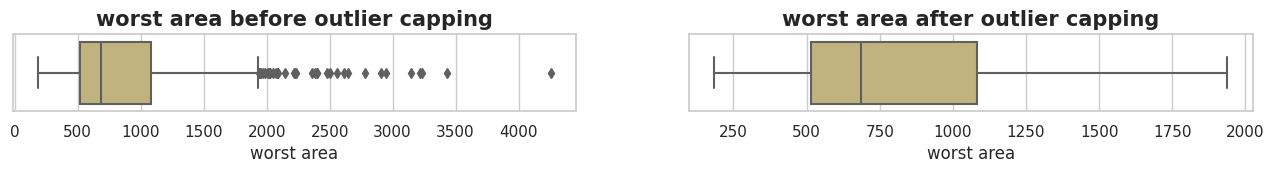

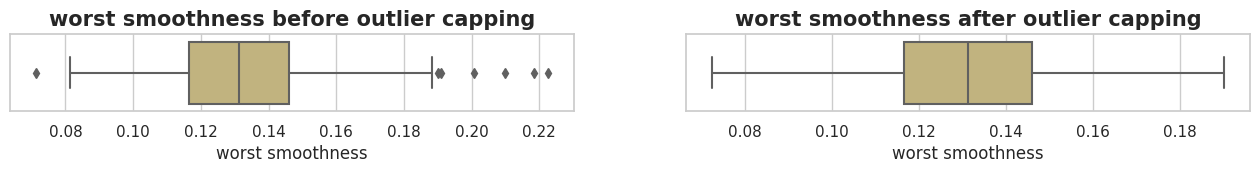

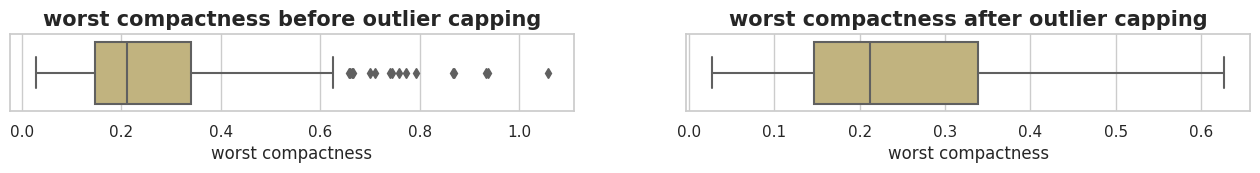

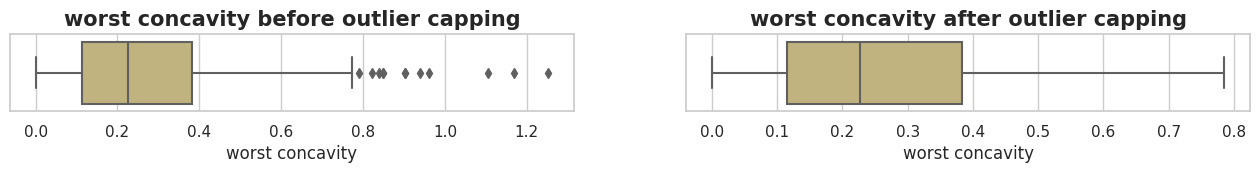

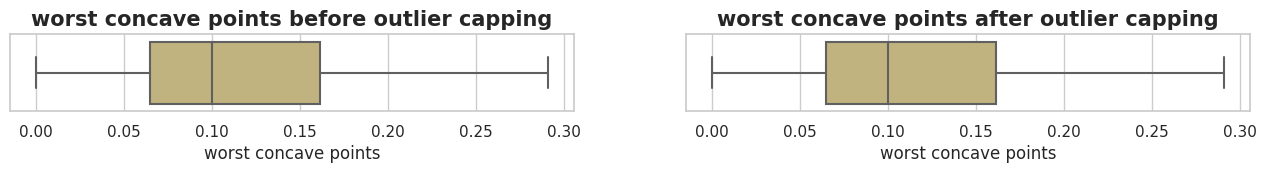

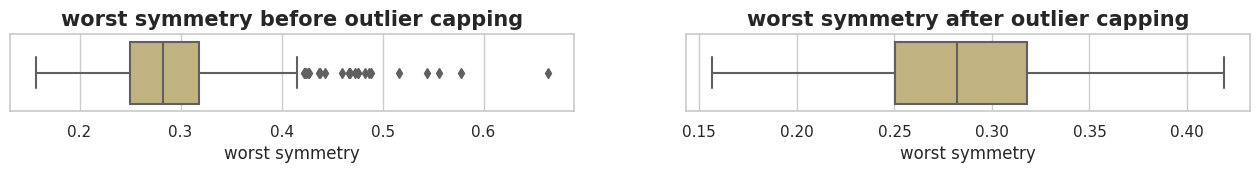

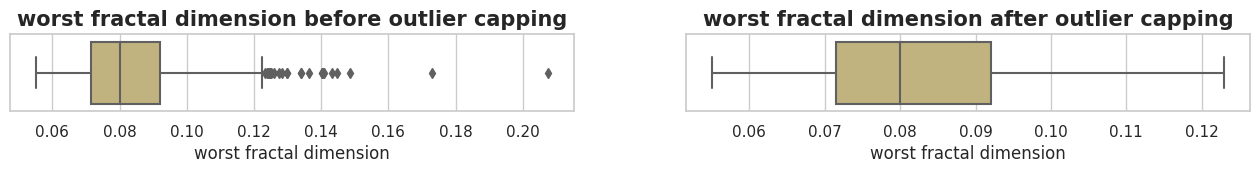

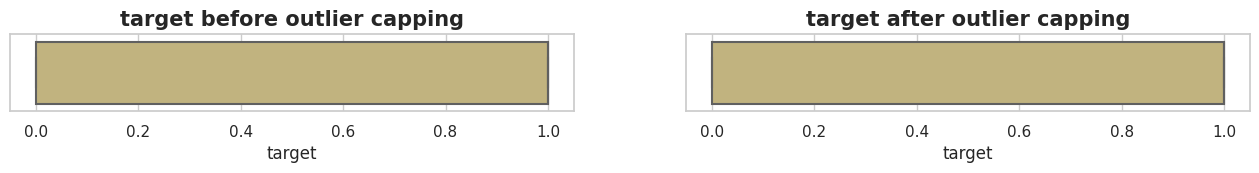

In [189]:
### Checking distribution of Continuous numerical features

for feature in df:
    plt.figure(figsize=(16,1))
    plt.subplot(121)
    sns.boxplot(data=df_breast_cancer , x=feature, color='y')
    plt.title("{} before outlier capping".format(feature), fontweight="bold", fontsize=15)

    plt.subplot(122)
    sns.boxplot(data=data1, x=feature, color='y')
    plt.title("{} after outlier capping".format(feature), fontweight="bold", fontsize=15)
    plt.show();

# Correlation

In [190]:
# Finding out the correlation between the features
corr = df.corr()
corr.shape

(31, 31)

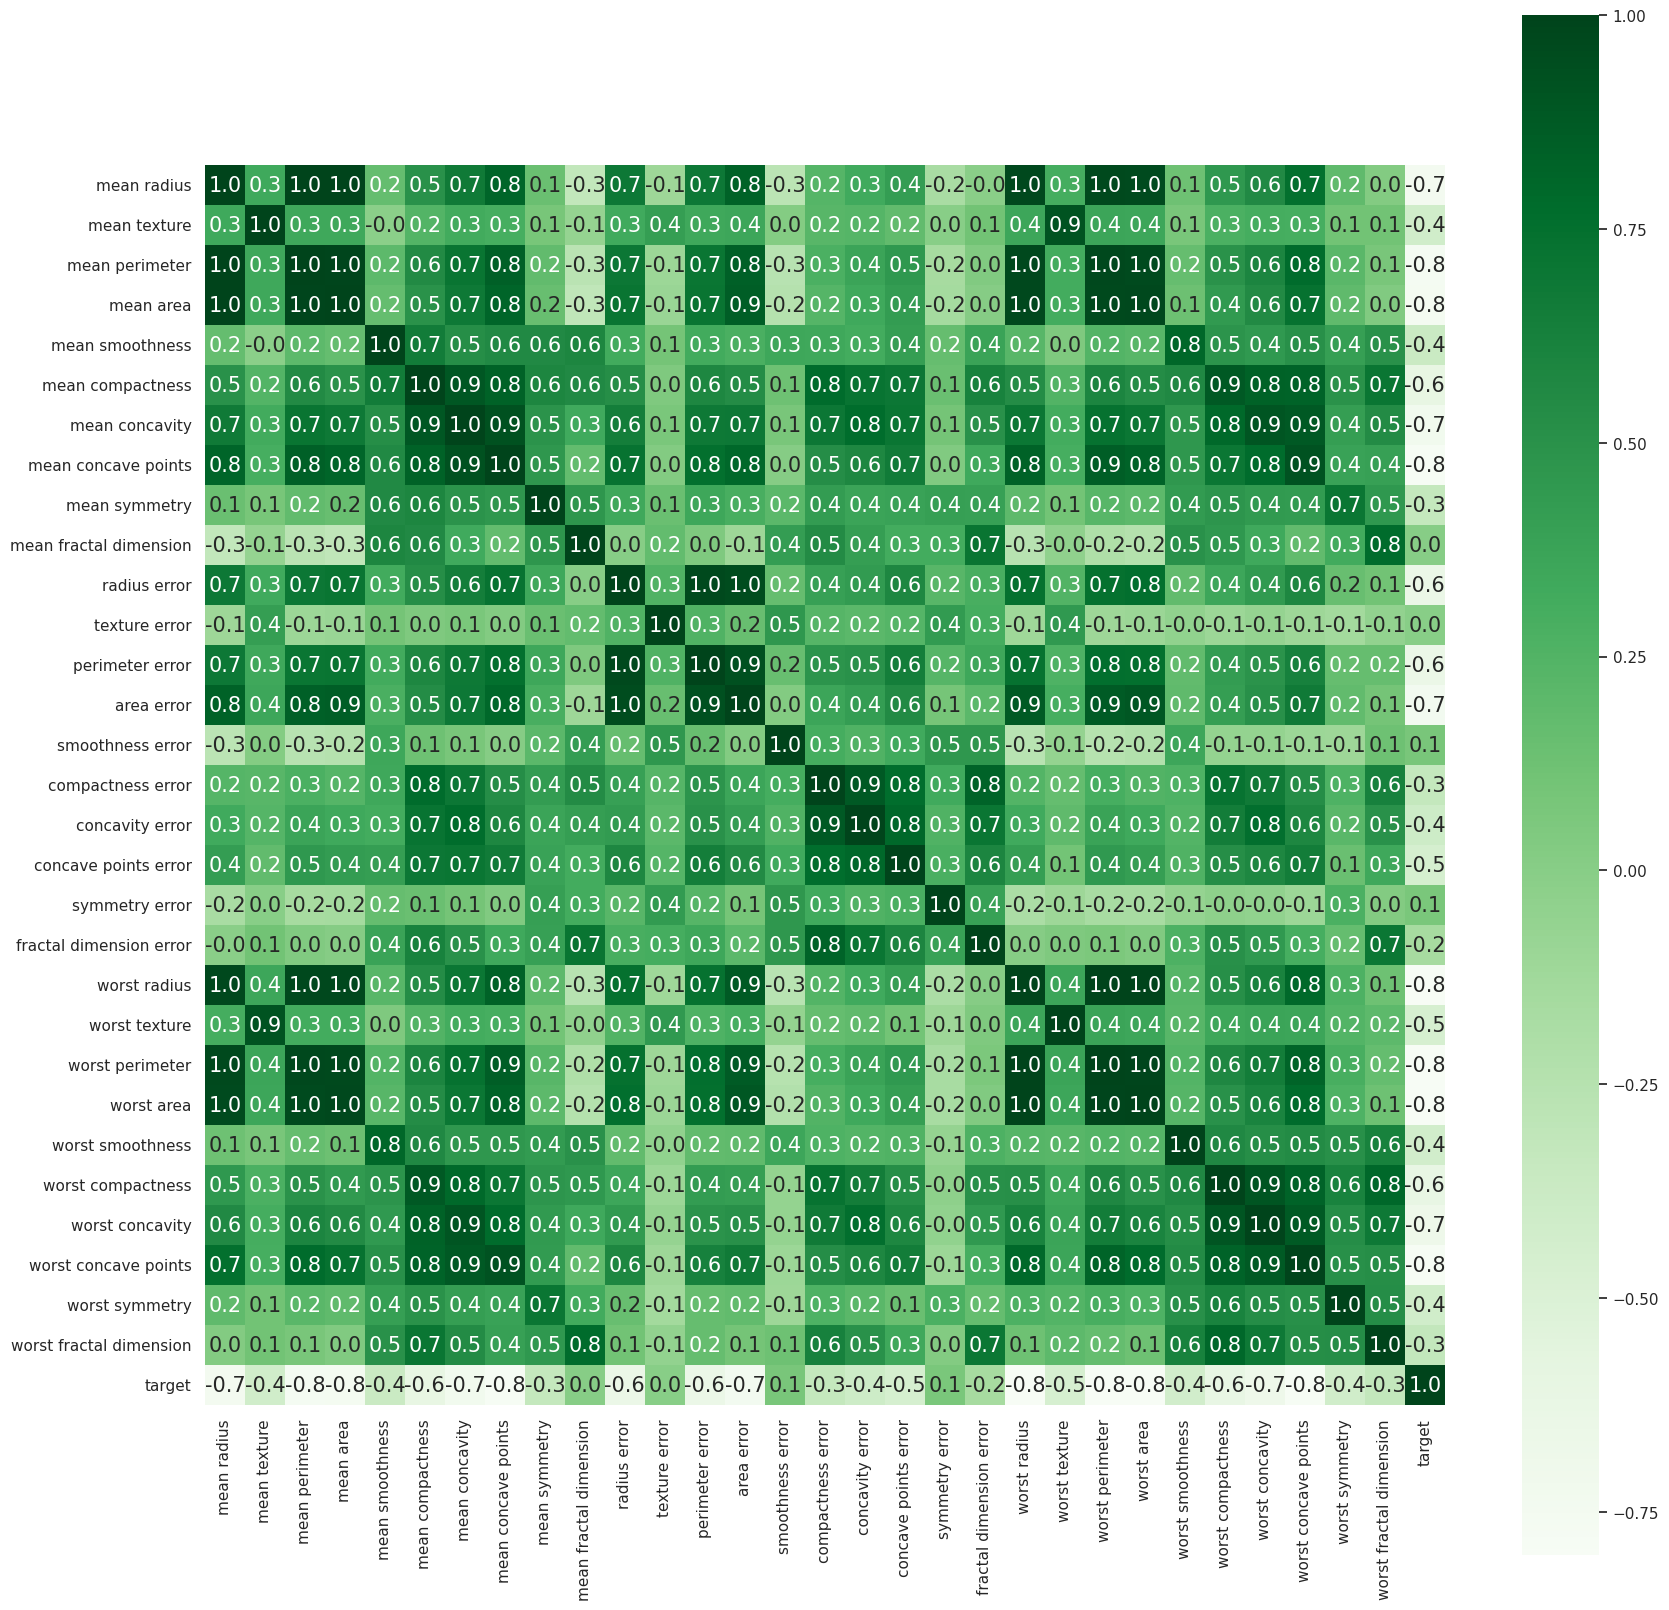

In [191]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()

# Model Training

In [192]:
# Spliting target variable and independent variables
X = df.drop(['target'], axis = 1)
y = df['target']

In [193]:
X.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.22862,0.28241,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902


In [194]:
y.head(2)

0    0.0
1    0.0
Name: target, dtype: float64

# Train test split

In [195]:
# Splitting the data into training set and testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [196]:
print("Size of  X_train:", X_train.shape)
print("Size of  X_test:", X_test.shape)
print("Size of  y_train:", y_train.shape)
print("Size of  y_test:",  y_test.shape)

Size of  X_train: (398, 30)
Size of  X_test: (171, 30)
Size of  y_train: (398,)
Size of  y_test: (171,)


In [197]:
# Scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic regression

In [198]:
# Logistic Regression

# Import library for LogisticRegression
from sklearn.linear_model import LogisticRegression

# Create a Logistic regression classifier
logreg = LogisticRegression()

# Train the model using the training sets
logreg.fit(X_train, y_train)

LogisticRegression()

In [199]:
# Prediction on test data
y_pred = logreg.predict(X_test)

# Model Evaluation

In [200]:
from sklearn import metrics

# Calculating the accuracy
acc_logreg = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Logistic Regression model : ', acc_logreg )

Accuracy of Logistic Regression model :  97.08


In [201]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_pred, y_test)
cm

array([[ 61,   3],
       [  2, 105]])

## Interpretation of confusion matrix:

- True Positives (TP): 105



- True Negatives (TN): 61


- False Positives (FP): 3



- False Negatives (FN): 2

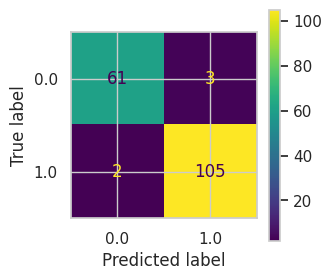

In [202]:
from sklearn.metrics import ConfusionMatrixDisplay

# Calculate the confusion matrix
cm = confusion_matrix(y_pred, y_test, labels=logreg.classes_)

# Create a smaller figure with the desired size
plt.figure(figsize=(3, 3))  # Adjust the width and height as needed

# Create the ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)

# Get the current axes and set the size within the axes
ax = plt.gca()
disp.plot(ax=ax)
plt.show()


In [203]:
# Getting metrices for the models

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print("Logistic Regression Classification report")
print( classification_report(y_test, y_pred))

Logistic Regression Classification report
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96        63
         1.0       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



# Interpretation of the classification report:

1. Precision:
   - Precision measures the accuracy of positive predictions made by the model, indicating how many of the predicted positive instances are actually positive.
   - For class "0.0" (presumably representing the negative class), the precision is 0.95. It means that out of all instances predicted as "0.0," 95% were correctly classified as "0.0," while 5% were incorrectly classified as "1.0."
   - For class "1.0" (presumably representing the positive class), the precision is 0.98. It means that out of all instances predicted as "1.0," 98% were correctly classified as "1.0," while 2% were incorrectly classified as "0.0."

2. Recall (Sensitivity):
   - Recall measures the ability of the model to correctly identify positive instances out of all the actual positive instances.
   - For class "0.0," the recall is 0.97, indicating that the model correctly identified 97% of the actual positive instances as "0.0."
   - For class "1.0," the recall is also 0.97, indicating that the model correctly identified 97% of the actual positive instances as "1.0."

3. F1-score:
   - The F1-score is the harmonic mean of precision and recall. It balances the trade-off between precision and recall, especially in cases of imbalanced classes.
   - For class "0.0," the F1-score is 0.96, which combines the precision and recall scores for class "0.0."
   - For class "1.0," the F1-score is 0.98, which combines the precision and recall scores for class "1.0."

4. Support:
   - Support represents the number of samples in each class in the dataset.
   - For class "0.0," the support is 63, indicating there are 63 samples of class "0.0."
   - For class "1.0," the support is 108, indicating there are 108 samples of class "1.0."

5. Accuracy:
   - Accuracy is an overall measure of how many predictions made by the model are correct. It is calculated as (TP + TN) / Total.
   - In this case, the accuracy of the Logistic Regression model is 0.97 or 97%, indicating that 97% of the predictions are correct.

6. Macro Avg:
   - Macro average calculates the mean of precision, recall, and F1-score across all classes, without considering class imbalance.

7. Weighted Avg:
   - Weighted average calculates the mean of precision, recall, and F1-score across all classes, taking into account the number of samples in each class (weighted by support).


# Support Vector Classifier

In [204]:
  # SVM Classifier

# Import Library of Support Vector Machine model
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Create a Support Vector Classifier
svc = svm.SVC()

# Hyperparameter Optimization
parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Run the grid search
grid_obj = GridSearchCV(svc, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the svc to the best combination of parameters
svc = grid_obj.best_estimator_

# Train the model using the training sets
svc.fit(X_train,y_train)

SVC(C=100, gamma=0.001)

In [205]:
# Prediction on test data
y_pred = svc.predict(X_test)

In [206]:
# Calculating the accuracy
acc_svm = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of SVM model : ', acc_svm )

Accuracy of SVM model :  97.66


In [207]:
# Calculate the confusion matrix
cm = confusion_matrix(y_pred, y_test)
cm

array([[ 62,   3],
       [  1, 105]])

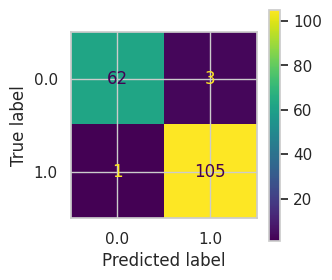

In [208]:

# Calculate the confusion matrix
cm = confusion_matrix(y_pred, y_test, labels=logreg.classes_)

# Create a smaller figure with the desired size
plt.figure(figsize=(3, 3))  # Adjust the width and height as needed

# Create the ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)

# Get the current axes and set the size within the axes
ax = plt.gca()
disp.plot(ax=ax)
plt.show()


In [209]:
# Getting metrices for the models

print("SVC Classification report")
print( classification_report(y_test, y_pred))

SVC Classification report
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97        63
         1.0       0.99      0.97      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



# Decision Tree

In [210]:
# Decision Tree Classifier

# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create a Decision tree classifier model
clf = DecisionTreeClassifier()

# Hyperparameter Optimization
parameters = {'max_features': ['log2', 'sqrt','auto'],
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50],
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }

# Run the grid search
grid_obj = GridSearchCV(clf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Train the model using the training sets
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features='log2')

In [211]:
# Prediction on test set
y_pred = clf.predict(X_test)

In [212]:
# Calculating the accuracy
acc_dt = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Decision Tree model : ', acc_dt )

Accuracy of Decision Tree model :  91.81


In [213]:
# Calculate the confusion matrix
cm = confusion_matrix(y_pred, y_test)
cm

array([[58,  9],
       [ 5, 99]])

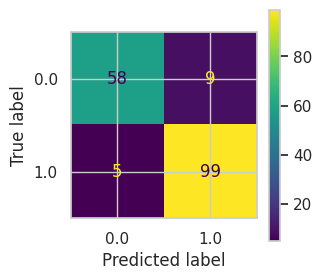

In [214]:
# Calculate the confusion matrix
cm = confusion_matrix(y_pred, y_test, labels=logreg.classes_)

# Create a smaller figure with the desired size
plt.figure(figsize=(3, 3))  # Adjust the width and height as needed

# Create the ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)

# Get the current axes and set the size within the axes
ax = plt.gca()
disp.plot(ax=ax)
plt.show()


In [215]:
# Getting metrices for the models

print("Decision tree Classification report")
print( classification_report(y_test, y_pred))

Decision tree Classification report
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89        63
         1.0       0.95      0.92      0.93       108

    accuracy                           0.92       171
   macro avg       0.91      0.92      0.91       171
weighted avg       0.92      0.92      0.92       171



# Random Forest Classifier

In [216]:
# Random Forest Classifier

# Import library of RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Hyperparameter Optimization
parameters = {'n_estimators': [4, 6, 9, 10, 15],
              'max_features': ['log2', 'sqrt','auto'],
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

# Run the grid search
grid_obj = GridSearchCV(rf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the rf to the best combination of parameters
rf = grid_obj.best_estimator_

# Train the model using the training sets
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       n_estimators=15)

In [217]:
# Prediction on test data
y_pred = rf.predict(X_test)

In [218]:
# Calculating the accuracy
acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Accuracy of Random Forest model : ', acc_rf )

Accuracy of Random Forest model :  95.32


In [219]:
# Calculate the confusion matrix
cm = confusion_matrix(y_pred, y_test)
cm

array([[ 58,   3],
       [  5, 105]])

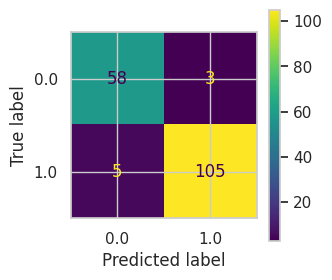

In [220]:
# Calculate the confusion matrix
cm = confusion_matrix(y_pred, y_test, labels=logreg.classes_)

# Create a smaller figure with the desired size
plt.figure(figsize=(3, 3))  # Adjust the width and height as needed

# Create the ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)

# Get the current axes and set the size within the axes
ax = plt.gca()
disp.plot(ax=ax)
plt.show()


In [221]:
# Getting metrices for the models

print("Random forest classifier Classification report")
print( classification_report(y_test, y_pred))

Random forest classifier Classification report
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94        63
         1.0       0.95      0.97      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



# K - Nearest Neighbors

In [222]:
# K - Nearest Neighbors

# Import library of KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN Classifier
knn = KNeighborsClassifier()

# Hyperparameter Optimization
parameters = {'n_neighbors': [3, 4, 5, 10],
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }

# Run the grid search
grid_obj = GridSearchCV(knn, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
knn = grid_obj.best_estimator_

# Train the model using the training sets
knn.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=3)

In [223]:
# Prediction on test data
y_pred = knn.predict(X_test)

In [224]:
# Calculating the accuracy
acc_knn = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of KNN model : ', acc_knn )

Accuracy of KNN model :  95.32


In [225]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[ 57,   2],
       [  6, 106]])

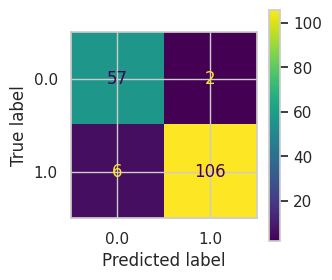

In [226]:
# Calculate the confusion matrix
cm = confusion_matrix(y_pred, y_test, labels=logreg.classes_)

# Create a smaller figure with the desired size
plt.figure(figsize=(3, 3))  # Adjust the width and height as needed

# Create the ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)

# Get the current axes and set the size within the axes
ax = plt.gca()
disp.plot(ax=ax)
plt.show()

In [227]:
# Getting metrices for the models

print("KNN Classification report")
print( classification_report(y_test, y_pred))

KNN Classification report
              precision    recall  f1-score   support

         0.0       0.97      0.90      0.93        63
         1.0       0.95      0.98      0.96       108

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



# Gaussian Naive Bayes

In [228]:
# Gaussian Naive Bayes

# Import library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(X_train,y_train)

GaussianNB()

In [229]:
# Prediction on test set
y_pred = gnb.predict(X_test)

In [230]:
# Calculating the accuracy
acc_nb = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Gaussian Naive Bayes model : ', acc_nb )

Accuracy of Gaussian Naive Bayes model :  91.23


In [231]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[57,  9],
       [ 6, 99]])

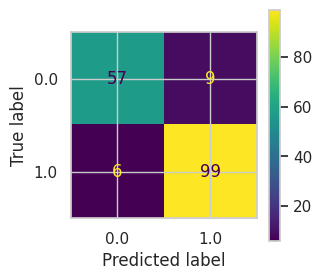

In [232]:
# Calculate the confusion matrix
cm = confusion_matrix(y_pred, y_test, labels=logreg.classes_)

# Create a smaller figure with the desired size
plt.figure(figsize=(3, 3))  # Adjust the width and height as needed

# Create the ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)

# Get the current axes and set the size within the axes
ax = plt.gca()
disp.plot(ax=ax)
plt.show()

In [233]:
# Getting metrices for the models

print("Gaussian Naive Bayes Classification report")
print( classification_report(y_test, y_pred))

Gaussian Naive Bayes Classification report
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88        63
         1.0       0.94      0.92      0.93       108

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.91       171
weighted avg       0.91      0.91      0.91       171



# Gradient Boosting Classifier

In [234]:
from sklearn.ensemble import GradientBoostingClassifier

## Import library
gbc = GradientBoostingClassifier()

# Hyperparameter Optimization
parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1],
    'n_estimators': [100, 150, 180]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 2, n_jobs = -5, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-5,
             param_grid={'learning_rate': [0.001, 0.1],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180]},
             verbose=1)

In [235]:
# best parameters

grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}

In [236]:
# best score

grid_search_gbc.best_score_

0.9522613065326633

In [237]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 180)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential', n_estimators=180)

In [238]:
#prediction on test data

y_pred = gbc.predict(X_test)

In [239]:
# Calculating the accuracy

print('Accuracy of Training model', accuracy_score(y_train, gbc.predict(X_train)))

acc_gbc = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

print( 'Accuracy of Gradient Boost Classifier model : ', acc_gbc )

Accuracy of Training model 1.0
Accuracy of Gradient Boost Classifier model :  97.66


In [240]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[ 60,   1],
       [  3, 107]])

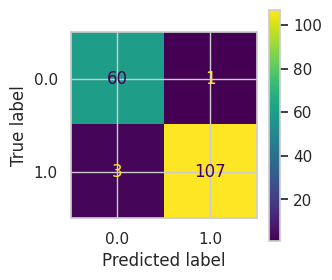

In [241]:
# Calculate the confusion matrix
cm = confusion_matrix(y_pred, y_test, labels=logreg.classes_)

# Create a smaller figure with the desired size
plt.figure(figsize=(3, 3))  # Adjust the width and height as needed

# Create the ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)

# Get the current axes and set the size within the axes
ax = plt.gca()
disp.plot(ax=ax)
plt.show()

In [242]:
# Getting metrices for the models

print("Gradient boost Classification report")
print( classification_report(y_test, y_pred))

Gradient boost Classification report
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97        63
         1.0       0.97      0.99      0.98       108

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



# Extreme GradientBoost Classifier

In [243]:
!pip install xgboost

In [244]:
import xgboost as xgb

# Create a KNN Classifier
knn = KNeighborsClassifier()

xgb_model = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 50, n_estimators = 100)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=50, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [245]:
# Prediction on test data
y_pred = xgb_model.predict(X_test)

In [246]:
# Calculating the accuracy
print("Accuracy on train data",accuracy_score(y_train, xgb_model.predict(X_train)))

acc_xgb = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

print( 'Accuracy of XGB model : ', acc_xgb )

Accuracy on train data 1.0
Accuracy of XGB model :  97.66


In [247]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[ 60,   1],
       [  3, 107]])

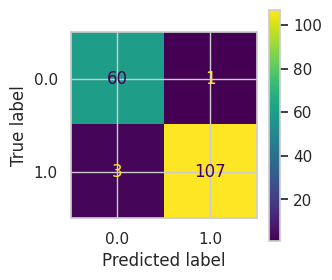

In [248]:
# Calculate the confusion matrix
cm = confusion_matrix(y_pred, y_test, labels=logreg.classes_)

# Create a smaller figure with the desired size
plt.figure(figsize=(3, 3))  # Adjust the width and height as needed

# Create the ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)

# Get the current axes and set the size within the axes
ax = plt.gca()
disp.plot(ax=ax)
plt.show()

In [249]:
# Getting metrices for the models

print("Extreme Gradient boost Classification report")
print( classification_report(y_test, y_pred))

Extreme Gradient boost Classification report
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97        63
         1.0       0.97      0.99      0.98       108

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



# Evaluation and comparision of all the models

In [250]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines',
              'K - Nearest Neighbors', 'Gradient Boost classifier', 'Extreme Gradient Boost classifier'],
    'Score': [acc_logreg, acc_nb, acc_dt, acc_rf, acc_svm, acc_knn, acc_gbc, acc_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Support Vector Machines,97.66
6,Gradient Boost classifier,97.66
7,Extreme Gradient Boost classifier,97.66
0,Logistic Regression,97.08
3,Random Forest,95.32
5,K - Nearest Neighbors,95.32
2,Decision Tree,91.81
1,Naive Bayes,91.23


### Conclusion:

The high accuracy achieved by several models indicates that the features computed from the FNA images provide valuable information for distinguishing between malignant and benign breast tumors, which can be leveraged to aid in early breast cancer detection and improve patient outcomes.

By choosing appropriate algorithms and fine-tuning their hyperparameters, it is possible to build reliable models that can assist medical professionals in the early detection of breast cancer and facilitate timely and effective treatments for patients.

Overall, the models can effectively addresses the problem statement by demonstrating the successful development of accurate predictive models for breast cancer diagnosis based on the provided features. The high accuracy achieved by these models fulfills the objective of creating a tool for early breast cancer detection, which can have a significant positive impact on patient outcomes and improve the chances of successful treatment.

### Thank you for reading all the way to the end.

## -Raviteja Padala
https://www.linkedin.com/in/raviteja-padala/